**Códigos útiles de Astronomía**


In [46]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import urllib.request


**Leer datos**

Casi como el csv solo que separados por tab, devuelve un dataframe.

In [21]:
def Data(l:str):
    direccion = l
    data = pd.read_csv(direccion, delimiter='\t')
    return data

**Distancia a partir de paralaje menor de 1 arcseg**

In [4]:
def Distance_less(df:pd.DataFrame):
    paralaje = df['Plx']
    lista_distancia = []
    for i in paralaje:
        distance = 1000 / i
        lista_distancia.append(distance)
    return lista_distancia

**Distancia a partir de paralaje mayor de 1 arcseg**

In [5]:
def Distance_more(df:pd.DataFrame):
    paralaje = df['Plx']
    lista_distancia = []
    for i in paralaje:
        distance = 1 / np.tan(i)
        lista_distancia.append(distance)
    return lista_distancia

**Calcular magnitud absoluta a partir de la distancia y magnitud visual**

In [17]:
def Magnitude(df:pd.DataFrame):
    m = df['Vmag']
    D = df['Distancia']
    lista_M = []
    indice = 0
    for i in m:
        Mv = i + 5*(np.log10(10/D[indice]))
        lista_M.append(Mv)
        indice += 1
        
    return lista_M 

**Contar estrellas dado su indice B-V**

Su orden de salida es roja, azul, amarilla, blanca

In [15]:
def num_color(df:pd.DataFrame):
    lista = [0,0,0,0]
    D = df['B-V']
    for i in D:
        if i > 1.0:
            lista[0] += 1
        if 0.45 < i < 1.0:
            lista[2] += 1
        if i < 0:
            lista[1] += 1
        if i == 0:
            lista[3] +=1
            
    return lista

**Hallar distancias con el módulo de distancia d**

Devuelve la distancia y el promedio de estas si hay más de una.

In [19]:
def GetDistance(d):
    promedio = 0
    list = []
    for i in d:
        D = (10**(i/5))*10
        list.append(D)
        
    promedio = np.sum(list)/len(list)

    return list,promedio

**Hallar distancias a los cúmulos de estrellas dadas las relaciones entre período y luminosidad**

In [25]:
def Distance_cum(df: pd.DataFrame):
    #Promedio de distancia y logaritmo
    df['m'] = (df['magMax'] + df['magMin'])/2
    df['Log(P)'] = np.log10(df['P'])
    
    #Relacion de magnitudes
    df['M'] = -1.4 -2.8*df['Log(P)']
    df['m-M'] = df['m']-df['M']
    
    #Modulo de distancia
    df['d'] = df['m-M']/5
    df['D'] = 10*(10**df['d'])
    
    #Promedio de todas las distancias halladas
    prom = round(np.sum(df['D'])/len(df['D']),2)
    return prom/1000

**Hallar distancias a cúmulos de estrellas para la constante de Hubble**

Se usan estrellas Supernovas de Tipo Ia

In [32]:
def Supernova_D(df: pd.DataFrame):
    Distance = []
    
    Distance_equal = []
    Velocity_equal = []
    
    Distance_bigger = []
    Velocity_bigger = []
    
    for i in range(881):
        index = df['l_mag'][i]
        d = (float(df['mag'][i]) + 19.5)/5
        D = (10*10**d)/1000000
        Distance.append(D)
        
        if index == '=':
            Distance_equal.append(D)
            Velocity_equal.append(df['GVhel'][i])
        
        if index == '>':
            Distance_bigger.append(D)
            Velocity_bigger.append(df['GVhel'][i])
            
    df['D'] = Distance
    
    return (Distance_equal,Velocity_equal,Distance_bigger,Velocity_bigger)

**Cargar datos de un txt online**

In [56]:
def Data2 (url:str, filename:str):
    urllib.request.urlretrieve(url,filename)
    data = np.loadtxt(filename)
    graphics_data = []

    for i in data:
        graphics_data.append([float(i[0]), float(i[1])])
        
    return data,graphics_data

**Cargar datos de un txt**

In [ ]:
df = pd.read_csv("sample.txt", sep=" ", header=None)

**Hallar líneas espectrales de un espectro de absorción**

También se puede usar como un código para hallar los mínimos de una función.

In [52]:
def Spectrum(graphics_data):
    marker_x = []
    marker_y = []
    y = []
    x = []

    for i in graphics_data:
        mark = graphics_data.index(i)
        y.append(i[1])
        x.append(i[0])

        if mark != 0 and mark != len(graphics_data)-1:
            last = graphics_data[mark - 1]
            next = graphics_data[mark + 1]

            #Hallar mínimos
            if last[1] > i[1] and next[1] > i[1]:
                marker_x.append(i[0])
                marker_y.append(i[1])
                
    return marker_x,marker_y

**Calcular efecto doppler visual**

In [60]:
def Visual_doppler(observed,original):
    return ((observed-original)/original)*30000

**Práctica 6: Diagrama HR**

In [10]:
data = Data(""r"C:\Users\aleja\OneDrive\Documentos\Astronomia\Codigos practicas\asu.tsv")

In [12]:
# Hallar el la distancia mas cercana y su magnitud
data['Distancia'] = Distance_less(data)
maxd = min(data['Distancia'])
data['M'] = Magnitude(data)
fila = data.loc[data['Distancia'] == maxd ]
print(fila)

         RAhms        DEdms   Vmag     Plx    B-V  Distancia          M
0  14 29 47.75  -62 40 52.9  11.01  772.33  1.807   1.294783  15.449015


In [16]:
#numero de estrellas por color
num_color(data)

[603, 5, 307, 0]

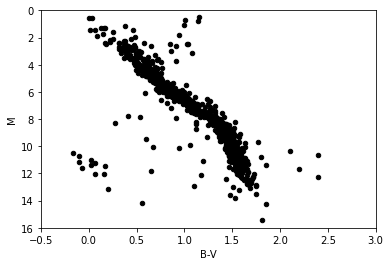

In [8]:
#Grafica HR
data.plot(kind='scatter', x='B-V', y='M',color='k')
plt.ylim(16,0)
plt.xlim(-0.5,3)
plt.show()

**Práctica 7**

In [20]:
d1 = [8.,8.9,9.6,9.7,9.5]

d2 = [7.1,7.9,7.7,7,7.9]

d3 = [6.1,7,7.4,7.8,7.2]

d4 = [9.6,10,11.5,11.2,11.7]

d5 = [7.9,6.8,7,7.5,6.7]

d6 = [3.3,3.5,3.,3.3,3.6]

D1 = GetDistance(d1)
print(D1)
D2 = GetDistance(d2)
print(D2)
D3 = GetDistance(d3)
print(D3)
D4 = GetDistance(d4)
print(D4)
D5 = GetDistance(d5)
print(D5)
D6 = GetDistance(d6)
print(D6)

([398.1071705534973, 602.5595860743578, 831.7637711026708, 870.9635899560806, 794.3282347242814], 699.5444704821775)
([263.0267991895381, 380.18939632056123, 346.73685045253166, 251.18864315095794, 380.18939632056123], 324.26621708683)
([165.95869074375605, 251.18864315095794, 301.9951720402016, 363.0780547701014, 275.4228703338166], 271.5286862077667)
([831.7637711026708, 1000.0, 1995.2623149688789, 1737.8008287493744, 2187.761623949552], 1550.5177077540952)
([380.18939632056123, 229.08676527677724, 251.18864315095794, 316.2277660168379, 218.7761623949553], 279.09374663201794)
([45.708818961487495, 50.11872336272722, 39.81071705534972, 45.708818961487495, 52.48074602497725], 46.76556487320583)


**Práctica 11: Relación de Cefeidas** 

In [23]:
data = Data(""r"C:\Users\aleja\OneDrive\Documentos\Astronomia\Codigos practicas\p11.tsv")

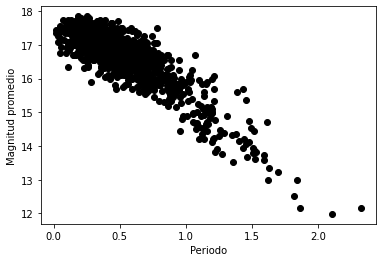

In [12]:

promedio_m = (data['magMax'] + data['magMin'])/2
Log = np.log10(data['P'])

plt.scatter(Log,promedio_m,color='k')
plt.xlabel('Periodo')
plt.ylabel('Magnitud promedio')
plt.show()


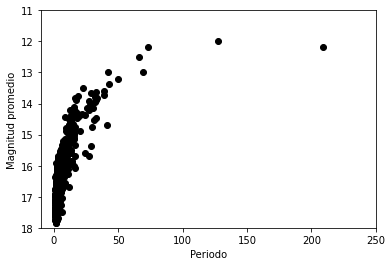

In [13]:
plt.scatter(data['P'],promedio_m,color='k')
plt.xlabel('Periodo')
plt.ylabel('Magnitud promedio')
plt.ylim(18,11)
plt.xlim(-10,250)
plt.show()

**Práctica 13: Distancias a cúmulos de estrellas**


1476.24198


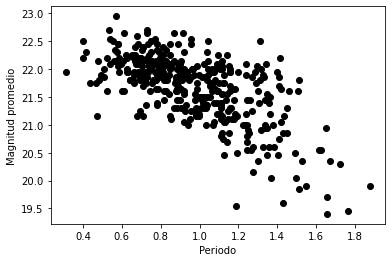

In [27]:
#M31
data = Data(""r"C:\Users\aleja\OneDrive\Documentos\Astronomia\Codigos practicas\p13_m31.tsv")

print(Distance_cum(data))

plt.scatter(data['Log(P)'],data['m'],color='k')
plt.xlabel('Periodo')
plt.ylabel('Magnitud promedio')
plt.show()

90.53149


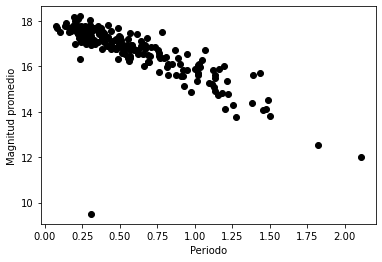

In [29]:
#SMC
data = Data(""r"C:\Users\aleja\OneDrive\Documentos\Astronomia\Codigos practicas\p13_smc.tsv") 

print(Distance_cum(data))

plt.scatter(data['Log(P)'],data['m'],color='k')
plt.xlabel('Periodo')
plt.ylabel('Magnitud promedio')
plt.show()

80.08067999999999


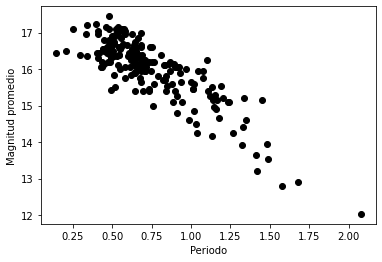

In [28]:
#LMC
data = Data(""r"C:\Users\aleja\OneDrive\Documentos\Astronomia\Codigos practicas\p13_lmc.tsv") 

print(Distance_cum(data))

plt.scatter(data['Log(P)'],data['m'],color='k')
plt.xlabel('Periodo')
plt.ylabel('Magnitud promedio')
plt.show()

1228.67501


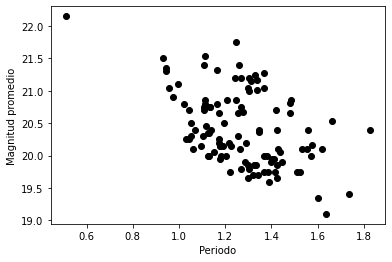

In [30]:
#M33 
data = Data(""r"C:\Users\aleja\OneDrive\Documentos\Astronomia\Codigos practicas\p13_m33.tsv") 

print(Distance_cum(data))

plt.scatter(data['Log(P)'],data['m'],color='k')
plt.xlabel('Periodo')
plt.ylabel('Magnitud promedio')
plt.show()

**Práctica 14: Constante de Hubble**

In [40]:
data = Data(""r"C:\Users\aleja\OneDrive\Documentos\Astronomia\Codigos practicas\p_14.tsv")
data_super = Supernova_D(data)

In [41]:
print(data)

     GVhel   mag l_mag Type           D
0      321   8.5     =   Ia    3.981072
1      626  12.9     =   Ia   30.199517
2     1730  11.6     =   Ia   16.595869
3     1142  11.8     =   Ia   18.197009
4      954  13.3     =   Ia   36.307805
..     ...   ...   ...  ...         ...
876   9620  17.4     >   Ia  239.883292
877   3244  14.9     >   Ia   75.857758
878   4963  15.9     >   Ia  120.226443
879   8745  16.5     >   Ia  158.489319
880   7988  17.1     >   Ia  208.929613

[881 rows x 5 columns]


In [42]:
Distance_equal = np.array(data_super[0])
Velocity_equal = np.array(data_super[1])

Distance_bigger = np.array(data_super[2])
Velocity_bigger = np.array(data_super[3])
    
#velocidad en kms y d en mpc 

In [43]:
def GetFit(x,y,n=1):
    
    l = x.shape[0]
    b = y
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)
    
    xsol = np.linalg.solve(AT,bT)
    
    return xsol

param_equal = GetFit(Distance_equal,Velocity_equal)
param_bigger = GetFit(Distance_bigger,Velocity_bigger)
param = [(param_equal[0]+ param_bigger[0])/1.35,(param_equal[1]+ param_bigger[1])/1.35]
param

[2399.446176212295, 69.95086889026493]

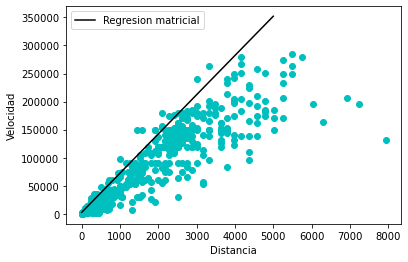

In [45]:
#grafica 
def GetModel(x,p):
    y = 0
    for n in range(len(p)):
        y += p[n]*x**n
        
    return y

_x = np.linspace(0,5000,2)

ym = GetModel(_x,param)
plt.scatter(data['D'],data['GVhel'],color='c')
plt.plot(_x,ym,color='k',label = "Regresion matricial")
plt.ylabel('Velocidad')
plt.xlabel('Distancia')
plt.legend()
plt.show()

**Práctica 8: Análisis de espectros**

In [51]:
#Datos y links

aldebaran1 = ['hdALDEBARAN_6134_6139_5034','hdALDEBARAN_6150_6170_5817','hdALDEBARAN_6180_6240_7780','hdALDEBARAN_6250_6270_3536','hdALDEBARAN_6270_6300_3612']
betelguese1 = ['hdBETELGEUSE_6134_6139_7524','hdBETELGEUSE_6150_6170_1240','hdBETELGEUSE_6180_6240_4925','hdBETELGEUSE_6250_6270_3295','hdBETELGEUSE_6270_6300_8839']
ngc1 = ['hdNGC6475_134_6134_6139_8310','hdNGC6475_134_6150_6170_4840','hdNGC6475_134_6180_6240_884','hdNGC6475_134_6250_6270_678','hdNGC6475_134_6270_6300_2365']

lineas_h =[6252.5554,6254.2585,6265.134,6280.6182,6297.7931]

primer_rango = [6136.9947,6137.6917]
segundo_rango = [6191.5584,6230.723]
tercer_rango = [6280.6182]


6280.333


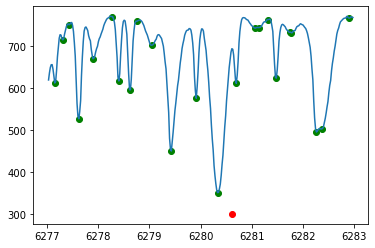

In [57]:
#NGC
lineas_x = [300]

data,date = Data2("https://www.eso.org/sci/php/tools/uvespop/tmp/hdNGC6475_134_6277_6283_9476.txt",'hdNGC6475_134_6277_6283_9476')
    
marker_x,marker_y = Spectrum(date)
      
print(marker_x[12])
plt.plot(marker_x,marker_y,"o",color='g')
plt.plot(data[:,0],data[:,1])
plt.scatter(tercer_rango,lineas_x,color='r')

6280.963


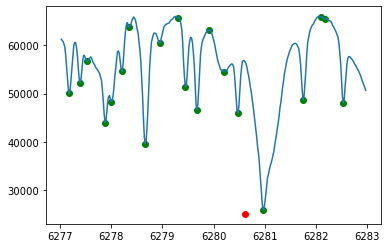

In [58]:
# betelguese
lineas_x = [25000]

data,date = Data2("https://www.eso.org/sci/php/tools/uvespop/tmp/hdBETELGEUSE_6277_6283_6454.txt","hdBETELGEUSE_6277_6283_6454")
    
marker_x,marker_y = Spectrum(date)
      
print(marker_x[15])
plt.plot(marker_x,marker_y,"o",color='g')
plt.plot(data[:,0],data[:,1])
plt.scatter(tercer_rango,lineas_x,color='r')

6280.43


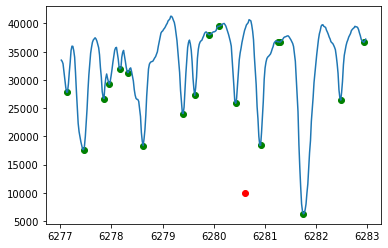

In [59]:
# aldebaran
lineas_x = [10000]

data,date = Data2("https://www.eso.org/sci/php/tools/uvespop/tmp/hdALDEBARAN_6277_6283_5169.txt",'hdALDEBARAN_6277_6283_5169')
    
marker_x,marker_y = Spectrum(date)
    
print(marker_x[11])
plt.plot(marker_x,marker_y,"o",color='g')
plt.plot(data[:,0],data[:,1])
plt.scatter(tercer_rango,lineas_x,color='r')